In [1]:
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

/Users/clodaya/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv("vehicle.csv")
print('\n\nshape of data:', data.shape)
print('\n\nCount of target variable:\n\n', data['class'].value_counts(),'\n\nData types of attributes:\n\n')
print(data.info())
print('\n\n First five rows of data:\n\n', data.head())
print('\n\n Few statistical values of attributes:\n\n', data.describe())




shape of data: (846, 19)


Count of target variable:

 car    429
bus    218
van    199
Name: class, dtype: int64 

Data types of attributes:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    flo

# In the above block of code
## - We read the data set and try to eye ball the data
## - There are 846 rows and 19 columns(attributes)
## - We check the target variable and see that there is 429 instances of car, 218 instnaces of bus and 199 instances of van
## - We check the data types of all attributes and see that compactness, max.length_aspect_ratio, max.length_rectangularity and hollows_ratio are integer types, class is type object and rest all attributes are float types
## - We check head of the data set and see 5 rows just to get the feel
## - We also see the statistical values of the attributes and see the data are mostly non decimal and variant from each other only in tens and hundreds place.

In [5]:
En = LabelEncoder() 
columns = data.columns
data['class'] = En.fit_transform(data['class'])
print(data['class'].head())

0    2
1    2
2    1
3    2
4    0
Name: class, dtype: int64


## - In this above block of code we use one hot encoding to convert our categorical variable(class) for convenience.

In [6]:
newdata = data.copy()
print(pd.DataFrame(newdata.isnull().sum(), columns= ['Number of missing values']))

                             Number of missing values
compactness                                         0
circularity                                         5
distance_circularity                                4
radius_ratio                                        6
pr.axis_aspect_ratio                                2
max.length_aspect_ratio                             0
scatter_ratio                                       1
elongatedness                                       1
pr.axis_rectangularity                              3
max.length_rectangularity                           0
scaled_variance                                     3
scaled_variance.1                                   2
scaled_radius_of_gyration                           2
scaled_radius_of_gyration.1                         4
skewness_about                                      6
skewness_about.1                                    1
skewness_about.2                                    1
hollows_ratio               

## - Here we check missing values and we see a few missing values here and there in some attributes.

In [7]:
X = newdata.iloc[:,0:19] 
imputer = SimpleImputer(missing_values=np.nan, strategy='median', verbose=1)
transformed_values = imputer.fit_transform(X)
column = X.columns
newdata = pd.DataFrame(transformed_values, columns = column) 
print(pd.DataFrame(newdata.isnull().sum(), columns= ['Number of missing values']))                      

                             Number of missing values
compactness                                         0
circularity                                         0
distance_circularity                                0
radius_ratio                                        0
pr.axis_aspect_ratio                                0
max.length_aspect_ratio                             0
scatter_ratio                                       0
elongatedness                                       0
pr.axis_rectangularity                              0
max.length_rectangularity                           0
scaled_variance                                     0
scaled_variance.1                                   0
scaled_radius_of_gyration                           0
scaled_radius_of_gyration.1                         0
skewness_about                                      0
skewness_about.1                                    0
skewness_about.2                                    0
hollows_ratio               

## - Here we replace the missing values by the median of the attribute.

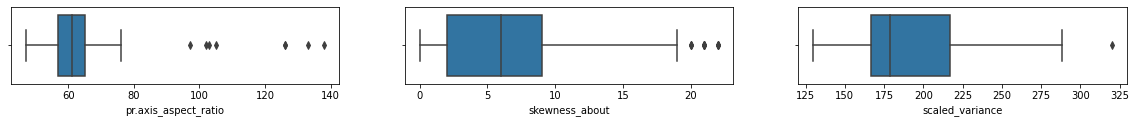

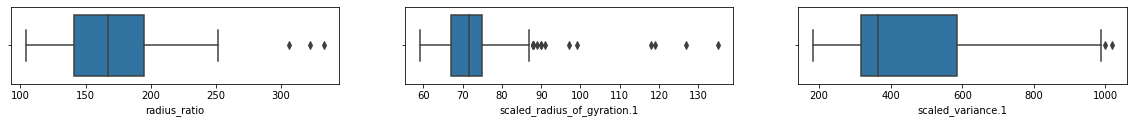

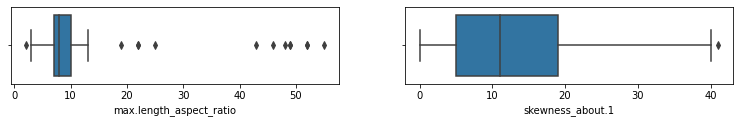



 After removal of outliers:




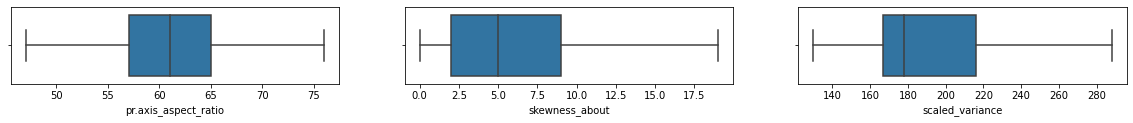

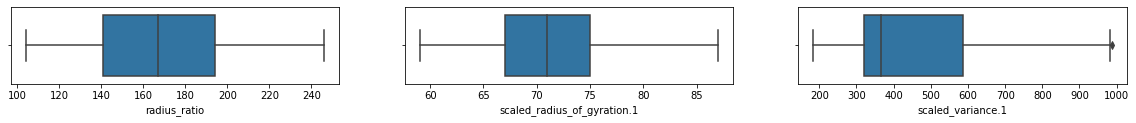

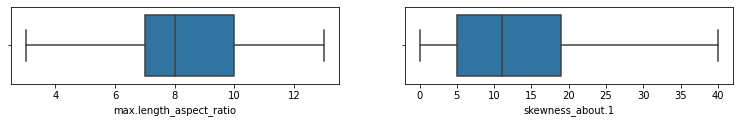

In [8]:
plt.figure(figsize= (20,15))
plt.subplot(9,3,1)
sns.boxplot(x= newdata['pr.axis_aspect_ratio'])
plt.subplot(9,3,2)
sns.boxplot(x= newdata.skewness_about)
plt.subplot(9,3,3)
sns.boxplot(x= newdata.scaled_variance)
plt.figure(figsize= (20,15))
plt.subplot(9,3,4)
sns.boxplot(x= newdata['radius_ratio'])
plt.subplot(9,3,5)
sns.boxplot(x= newdata['scaled_radius_of_gyration.1'])
plt.subplot(9,3,6)
sns.boxplot(x= newdata['scaled_variance.1'])
plt.figure(figsize= (20,15))
plt.subplot(9,3,7)
sns.boxplot(x= newdata['max.length_aspect_ratio'])
plt.subplot(9,3,8)
sns.boxplot(x= newdata['skewness_about.1'])
plt.show()
Q1 = newdata.quantile(0.25)
Q3 = newdata.quantile(0.75)
IQR = Q3 - Q1
newdata2 = newdata[~((newdata < (Q1 - 1.5 * IQR)) |(newdata > (Q3 + 1.5 * IQR))).any(axis=1)]
print('\n\n After removal of outliers:\n\n')
plt.figure(figsize= (20,15))
plt.subplot(9,3,1)
sns.boxplot(x= newdata2['pr.axis_aspect_ratio'])
plt.subplot(9,3,2)
sns.boxplot(x= newdata2.skewness_about)
plt.subplot(9,3,3)
sns.boxplot(x= newdata2.scaled_variance)
plt.figure(figsize= (20,15))
plt.subplot(9,3,4)
sns.boxplot(x= newdata2['radius_ratio'])
plt.subplot(9,3,5)
sns.boxplot(x= newdata2['scaled_radius_of_gyration.1'])
plt.subplot(9,3,6)
sns.boxplot(x= newdata2['scaled_variance.1'])
plt.figure(figsize= (20,15))
plt.subplot(9,3,7)
sns.boxplot(x= newdata2['max.length_aspect_ratio'])
plt.subplot(9,3,8)
sns.boxplot(x= newdata2['skewness_about.1'])
plt.show()

## - In the above block of code we see presence of few outliers
## - We use the IQR concept to check outliers.
## - Since number of outliers were very less we removed it.

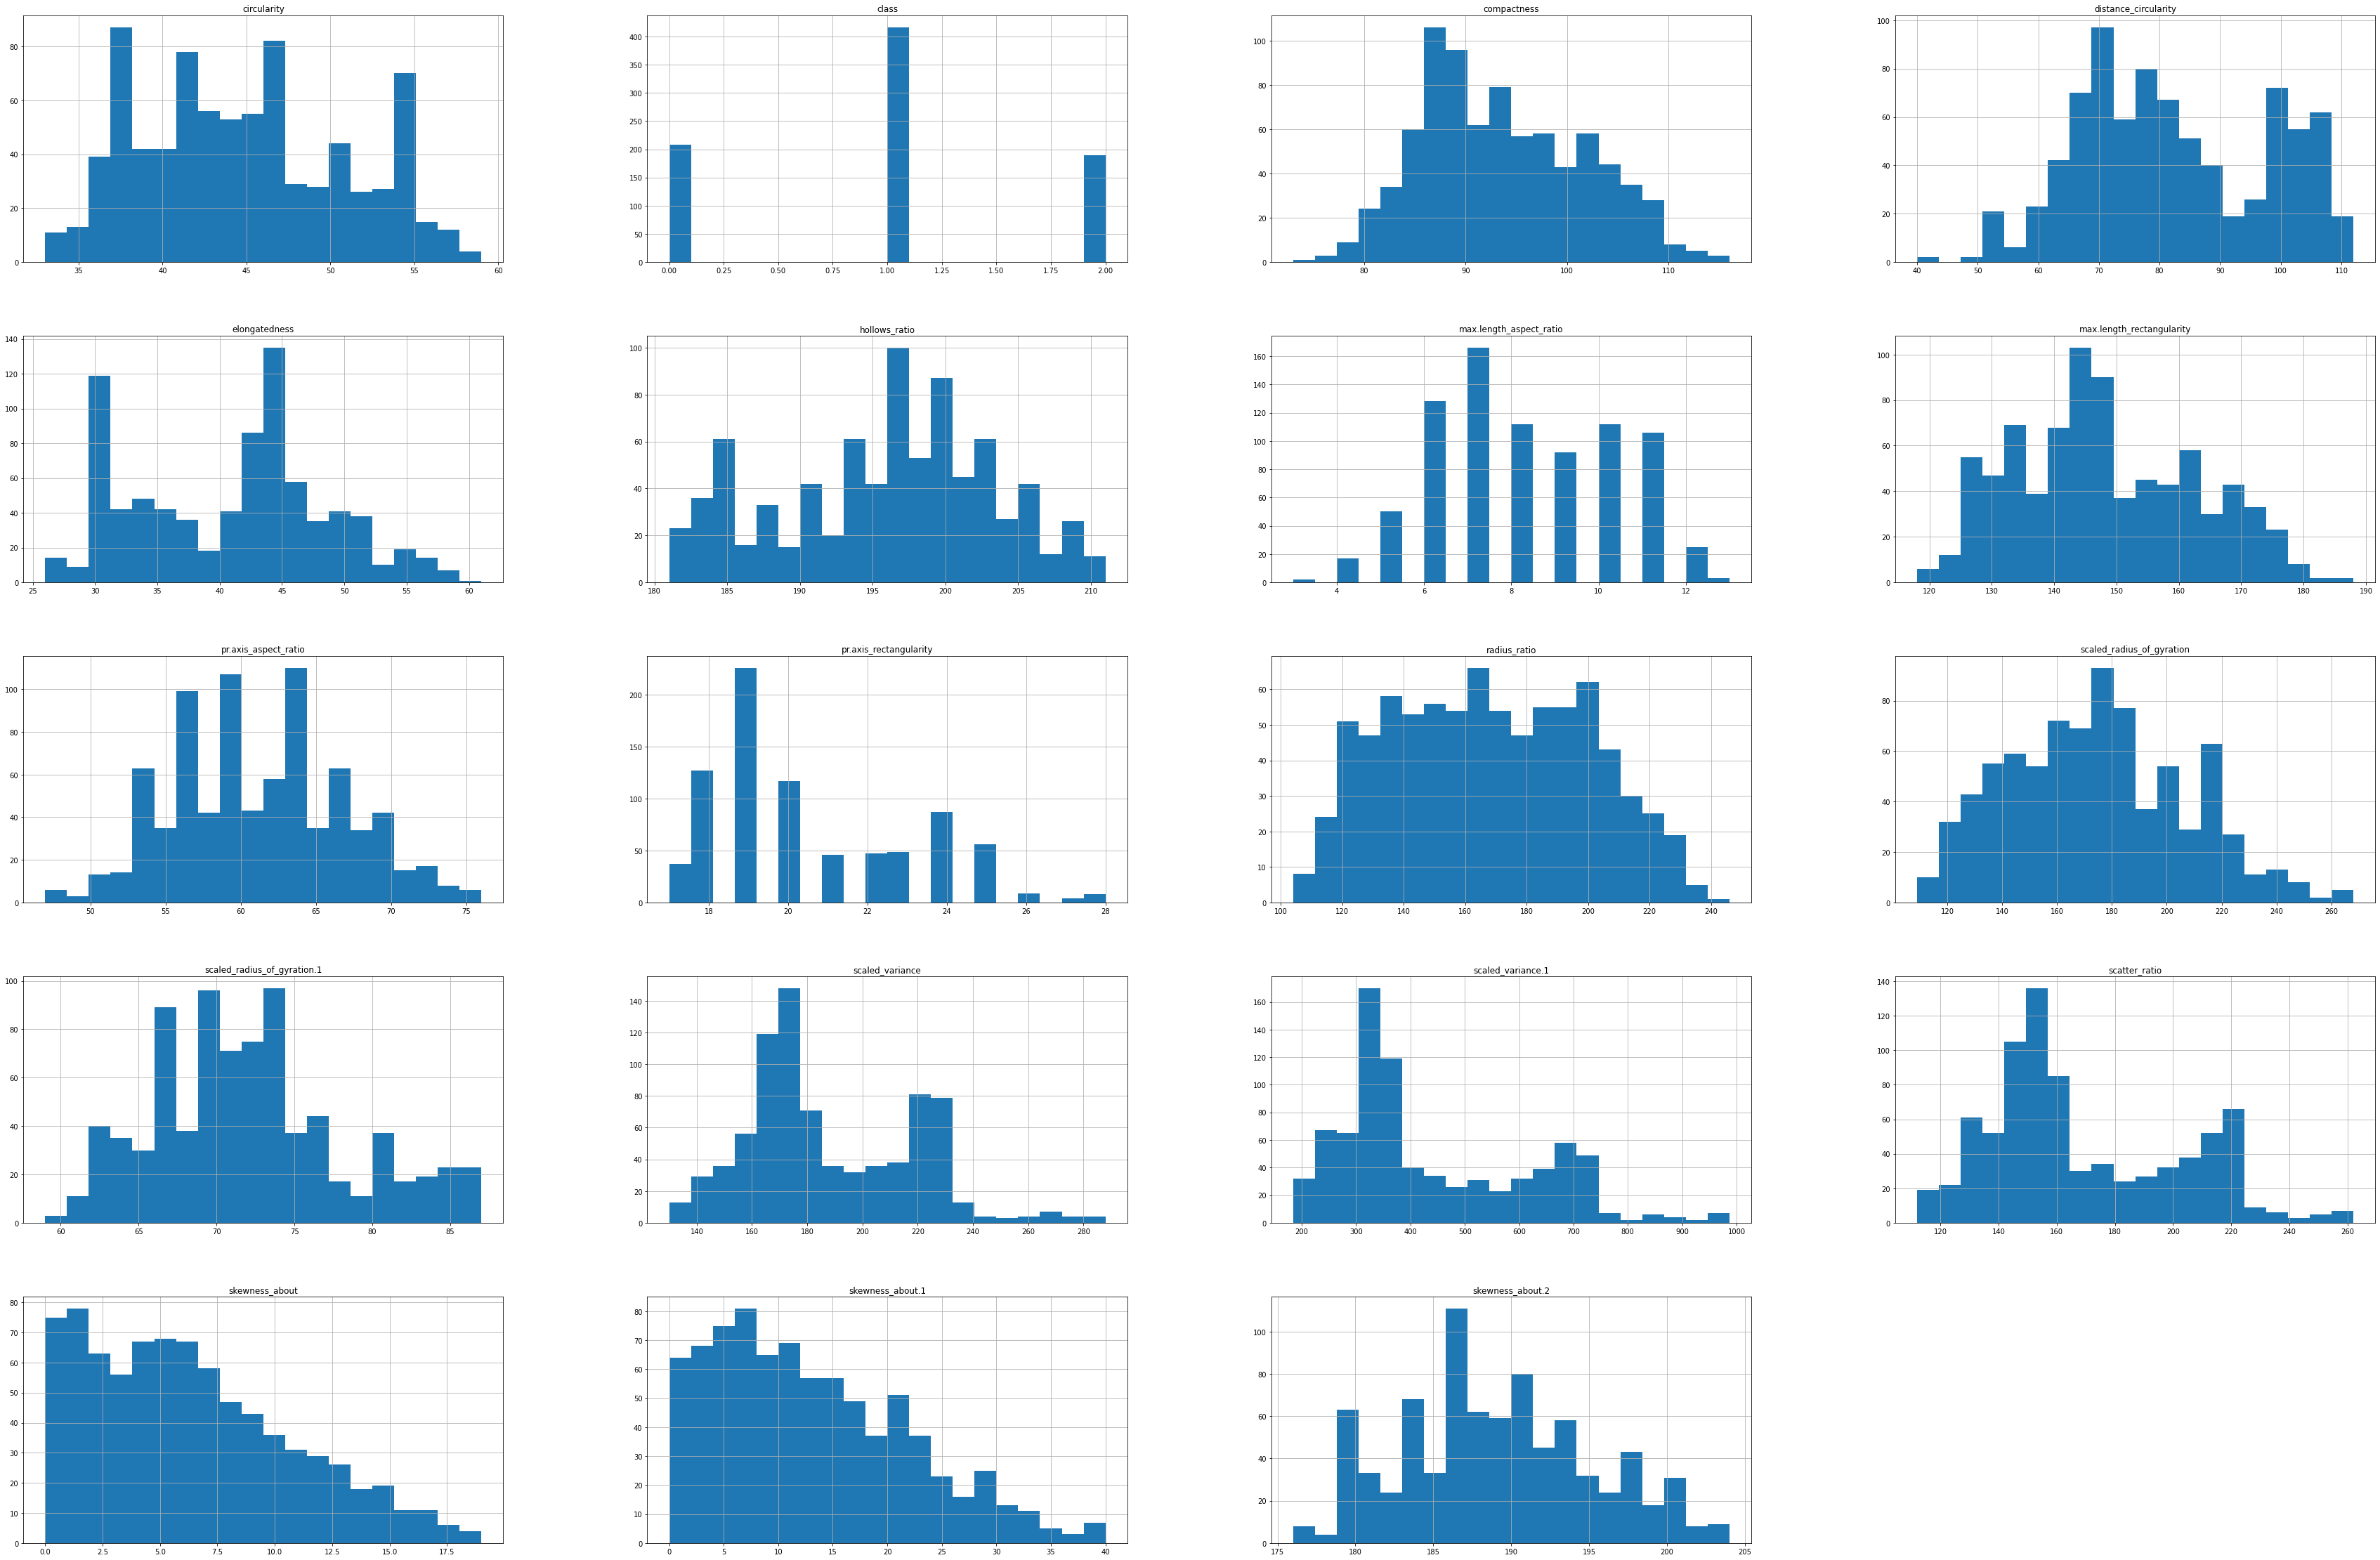

In [9]:
newdata2.hist(bins=20, figsize=(60,40))
plt.show()

## - In the above block of code we check histograms and distributions.
## - Almost all the attributes seem to be normally distributed
## - scaled valriance.1, skewness_about.1, skewness_about.2 and scatter_ratio, seem to be right skewed.


In [10]:
skewness = newdata2.skew()
print("skewValue of dataframe attributes: \n", skewness)

skewValue of dataframe attributes: 
 compactness                    0.308063
circularity                    0.270836
distance_circularity           0.128710
radius_ratio                   0.104279
pr.axis_aspect_ratio           0.163894
max.length_aspect_ratio        0.100687
scatter_ratio                  0.592250
elongatedness                  0.040538
pr.axis_rectangularity         0.752291
max.length_rectangularity      0.279915
scaled_variance                0.599998
scaled_variance.1              0.814309
scaled_radius_of_gyration      0.261190
scaled_radius_of_gyration.1    0.522234
skewness_about                 0.613544
skewness_about.1               0.654281
skewness_about.2               0.233775
hollows_ratio                 -0.235264
class                          0.031880
dtype: float64


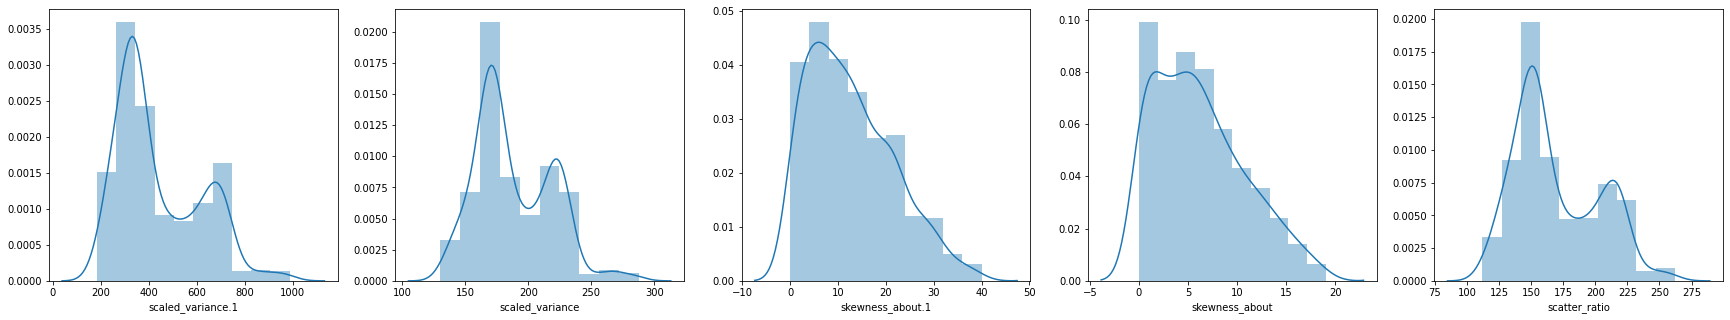

In [12]:
f, ax = plt.subplots(1, 5, figsize=(30,5))
sns.distplot(newdata2["scaled_variance.1"],bins=10, ax= ax[0])
sns.distplot(newdata2["scaled_variance"],bins=10, ax=ax[1])
sns.distplot(newdata2["skewness_about.1"],bins=10, ax= ax[2])
sns.distplot(newdata2["skewness_about"],bins=10, ax=ax[3])
sns.distplot(newdata2["scatter_ratio"],bins=10, ax=ax[4])
plt.show()


## - Here we take a closer look at our skewed attributes.

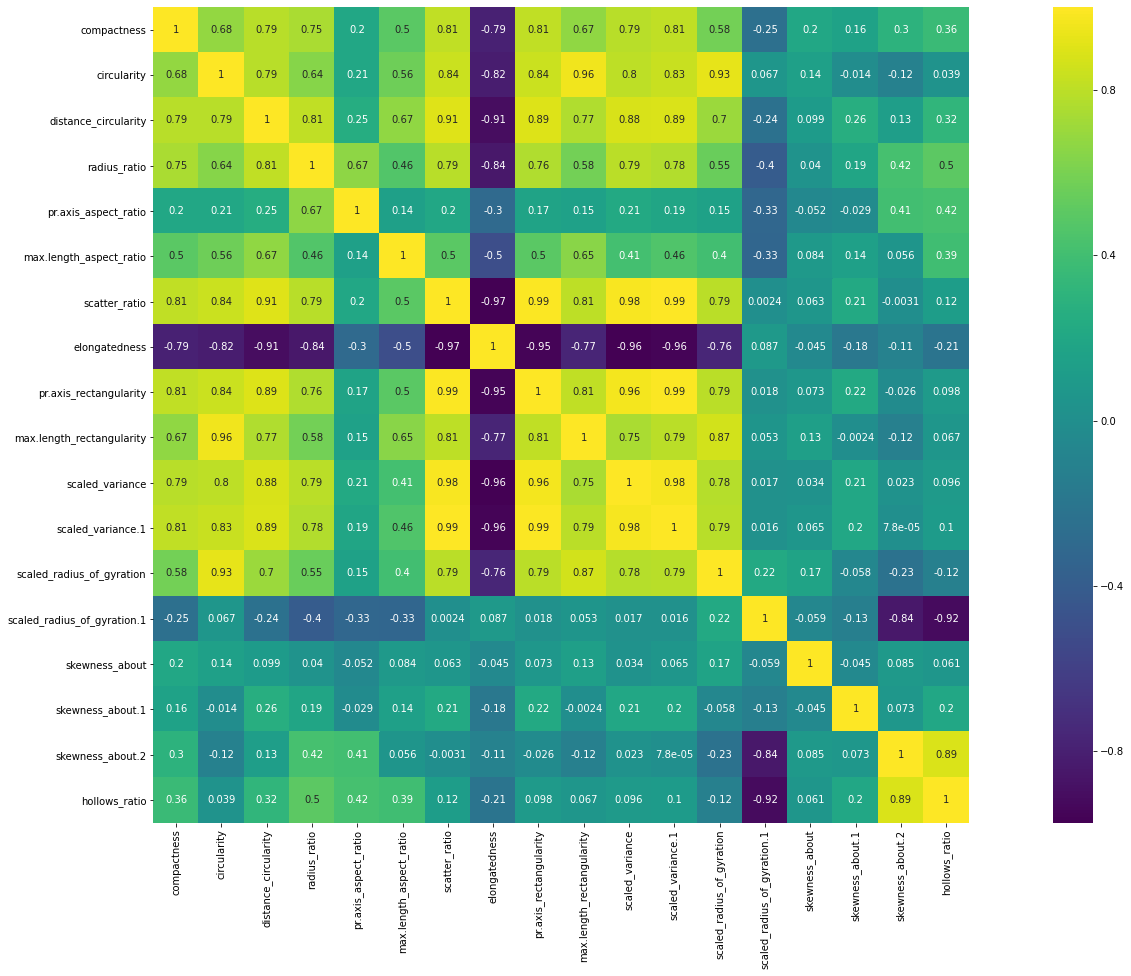

In [13]:
def correlation_heatmap(dataframe,l,w):
    correlation = dataframe.corr()
    plt.figure(figsize=(l,w))
    sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
    plt.show();
    
corr= newdata2.drop('class', axis=1)
correlation_heatmap(corr, 30,15)

## - here we check correlation between variables using a heatmap(Pearson's coeff)


# These attributes have Strong correlation ~ 0.8 and above
### - Scaled Variance & Scaled Variance.1
### - skewness_about_2 and hollow_ratio
### - ditance_circularity and radius_ratio
### - scaled _variance and scaled_radius_of_gyration
### - pr.axis_recatngularity and max.length_recatngularity
### - scatter_ratio and elongatedness
### - elongatedness and pr.axis_rectangularity



# These attributes have weak or no correlation
### -  max_length_aspect_ratio & radius_ratio
### - pr.axis_aspect_ratio & max_length_aspect_ratio
### - scaled_radius_gyration & scaled_radisu_gyration.1
### - scaled_radius_gyration.1 & skewness_about
### - skewness_about & skewness_about.1
### -  skewness_about.1 and skewness_about.2

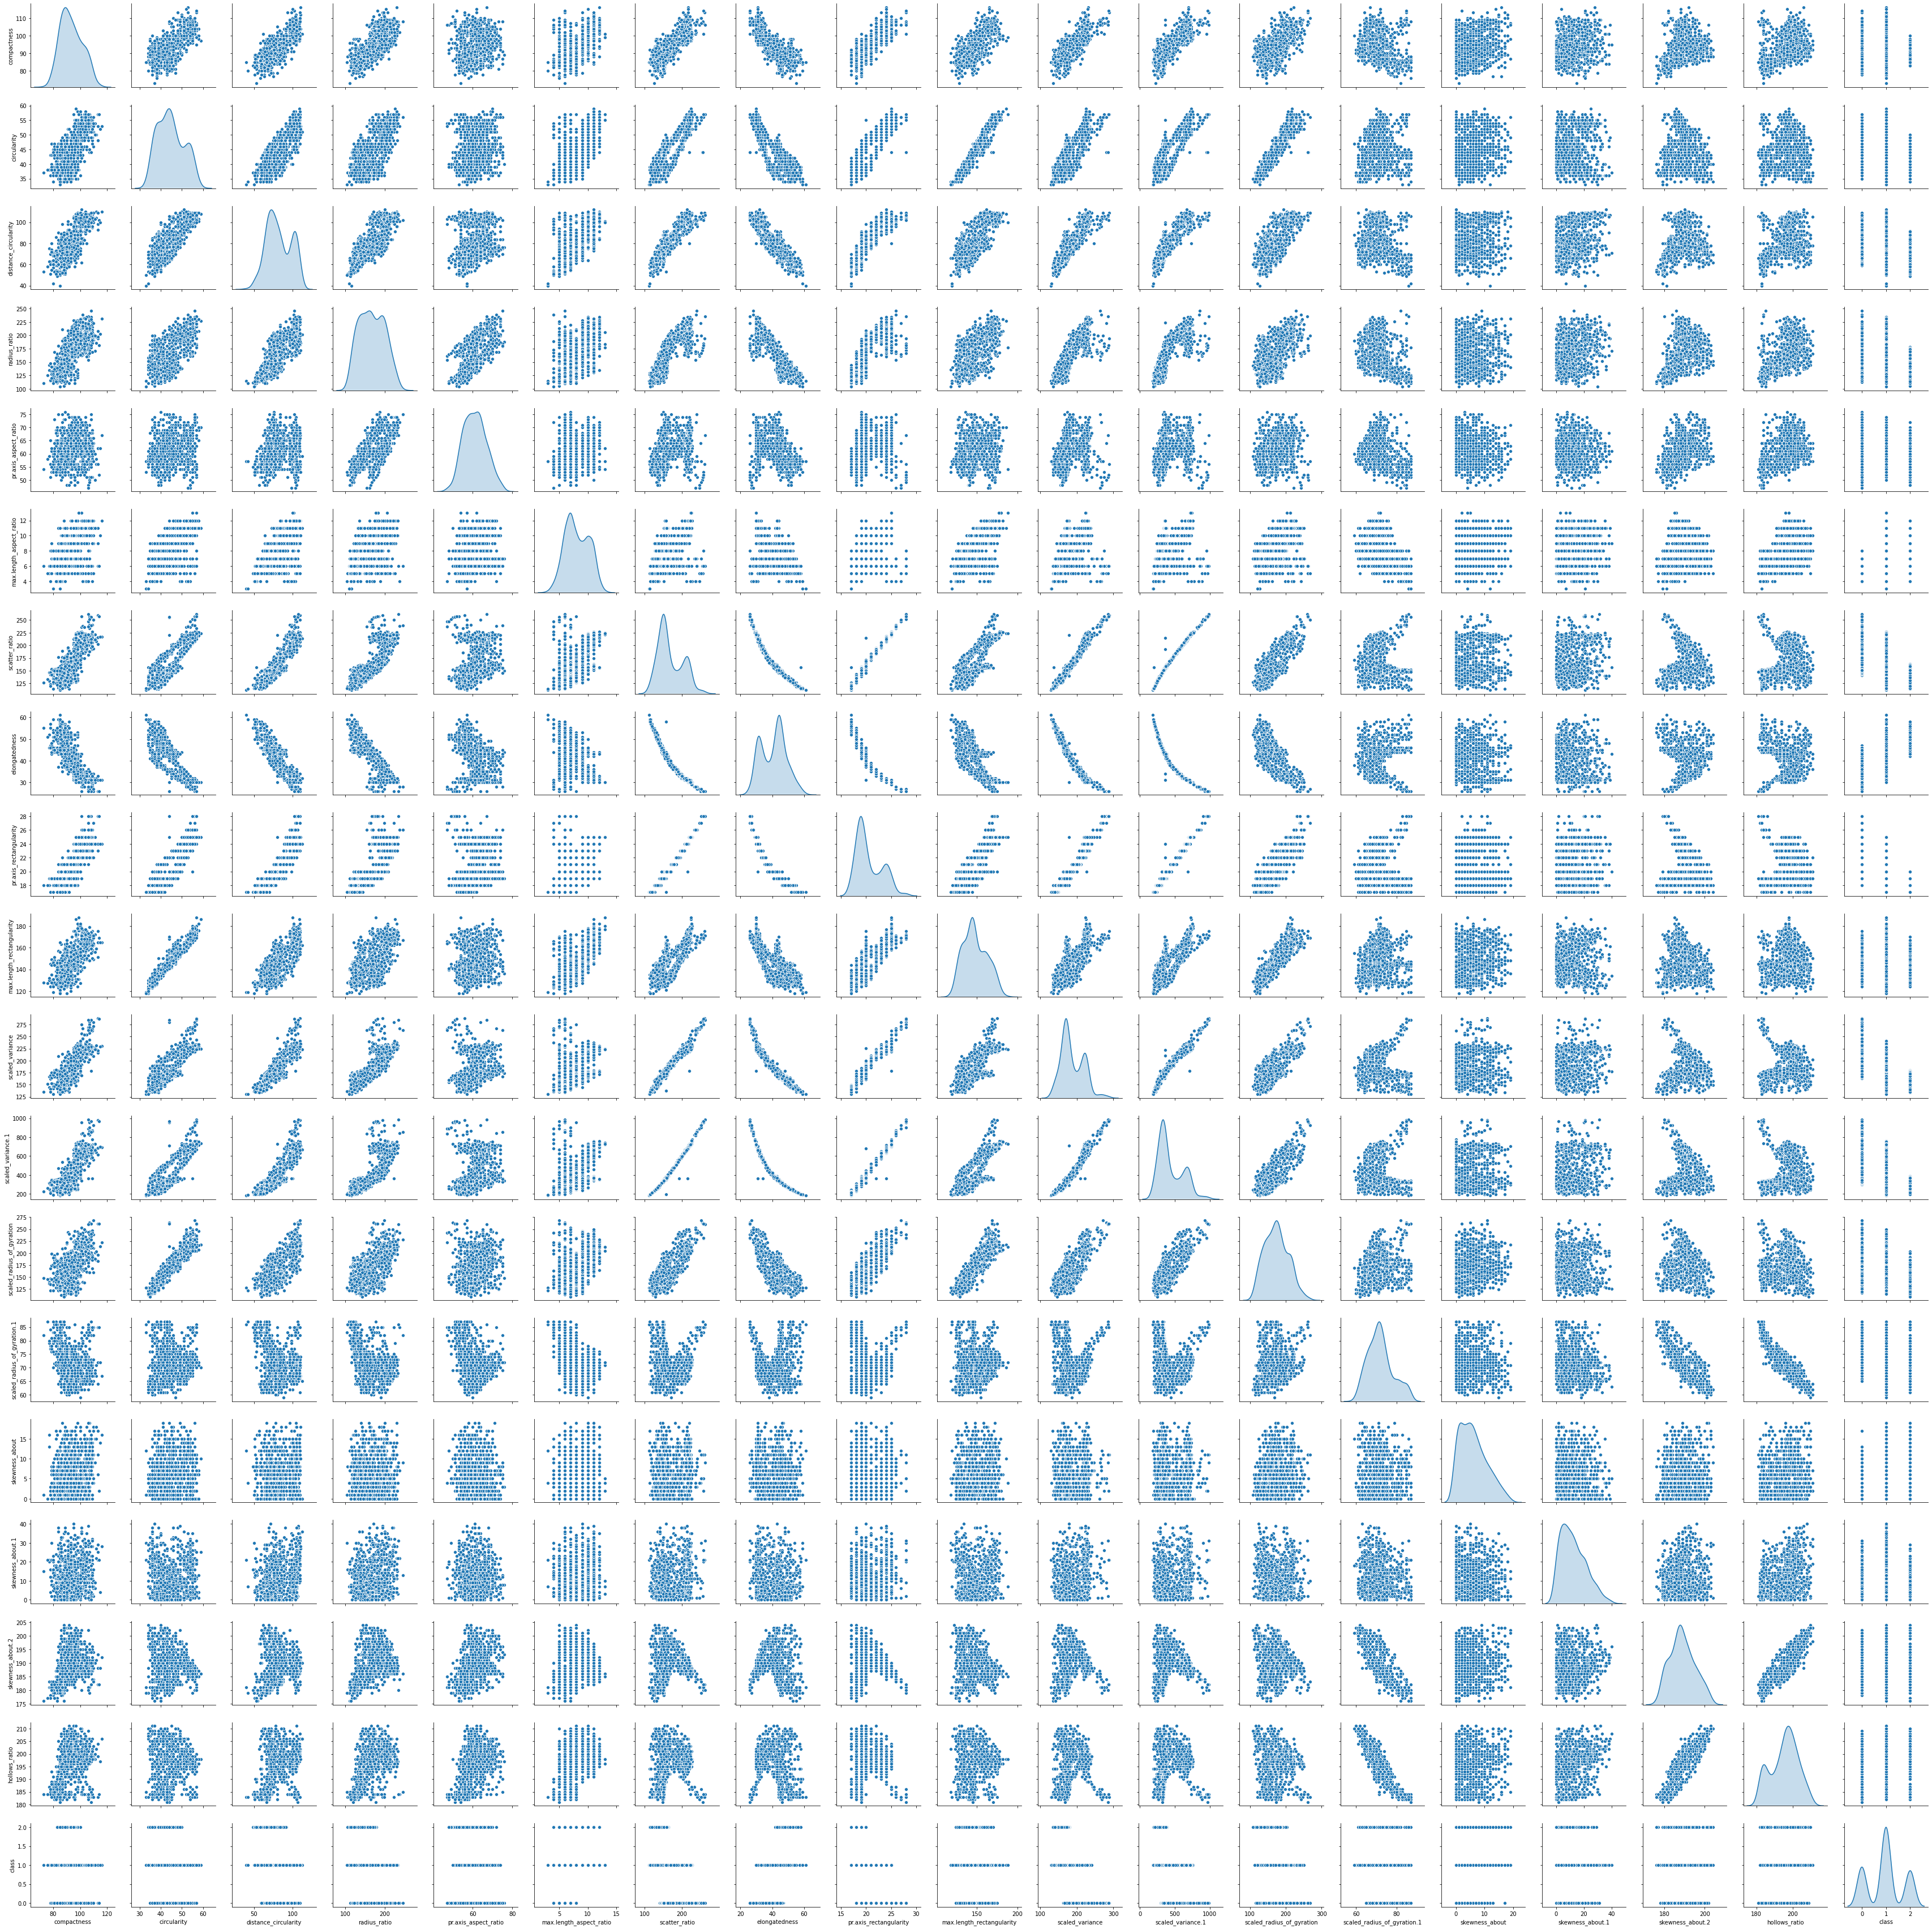

In [15]:
sns.pairplot(newdata2, diag_kind="kde")

# In th above pair plot analysis and adding up to our correlation analysis we see a lot of attrinutes which are highly correlated. So we can decide to remove columns which are highly correlated.There are 8 such columns which can be considered not important:

### - max.length_rectangularity
### - scaled_radius_of_gyration
### - skewness_about.2
### - scatter_ratio
### - elongatedness
### - pr.axis_rectangularity
### - scaled_variance
### - scaled_variance.1

# The rest columns can be considered important, but we will eventually get those using PCA

In [16]:
X = newdata2.iloc[:,0:18].values
y = newdata2.iloc[:,18].values
S = StandardScaler()
X_scaled = S.fit_transform(X)

## In the above block of code we normalise/scale our data set

In [18]:
O_X_train,O_X_test,O_y_train,O_y_test = train_test_split(X_scaled,y,test_size=0.30,random_state=1)
print("{0:0.2f}% data is in training set".format((len(O_X_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(O_X_test)/len(data.index)) * 100))




67.26% data is in training set
28.84% data is in test set


# In the above block of code we split the data into train:test(70%:30%)

In [19]:
svc = SVC()
svc.fit(O_X_train,O_y_train)
O_y_predict = svc.predict(O_X_test)
print("Model Score On Original Data ",svc.score(O_X_test, O_y_test)*100, '%')
print('\n\nConfusion matrix of Original Data:\n', confusion_matrix(O_y_test, O_y_predict ))

Model Score On Original Data  97.95081967213115 %


Confusion matrix of Original Data:
 [[ 78   0   0]
 [  1 119   1]
 [  0   3  42]]


## - In the above block of code we train a support vector machine
## - We get an accuracy of 97 .95 on the testing set
## - We also see the confusion matrix


In [21]:
kfold = KFold(n_splits=10, random_state=1)
results1 = cross_val_score(svc, X_scaled, y, cv=kfold)
print(results1)
print("Accuracy: %.3f%% (%.3f%%)" % (results1.mean()*100.0, results1.std()*100.0))

[0.93902439 1.         0.96341463 1.         0.96296296 0.97530864
 0.97530864 0.9382716  0.96296296 0.97530864]
Accuracy: 96.926% (1.997%)


## - Since a single test set can be misleading, we also perform a k fold cross validation getting an accuracy of 96.26% with a buffer of 1.9 %

In [22]:
cov_matrix = np.cov(X_scaled.T)
print("\n\nCovariance_matrix shape:",cov_matrix.shape)
print("\n\nCovariance_matrix:\n\n",cov_matrix)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('\n\nEigen Vectors:\n\n', eigenvectors)
print('\n Eigen Values: \n\n', eigenvalues)



Covariance_matrix shape: (18, 18)


Covariance_matrix:

 [[ 1.00123153e+00  6.80164027e-01  7.87792814e-01  7.46906930e-01
   2.00881439e-01  4.98273207e-01  8.11840645e-01 -7.89531434e-01
   8.12866245e-01  6.74996601e-01  7.92438680e-01  8.13494150e-01
   5.78399755e-01 -2.53990635e-01  2.00887113e-01  1.61304844e-01
   2.95777412e-01  3.64608943e-01]
 [ 6.80164027e-01  1.00123153e+00  7.87747162e-01  6.41725205e-01
   2.06409699e-01  5.64854067e-01  8.44804611e-01 -8.16768295e-01
   8.41196310e-01  9.62404205e-01  8.03750964e-01  8.33508154e-01
   9.26281607e-01  6.67790806e-02  1.40563881e-01 -1.43598307e-02
  -1.16976151e-01  3.92302597e-02]
 [ 7.87792814e-01  7.87747162e-01  1.00123153e+00  8.09326627e-01
   2.45756551e-01  6.69657073e-01  9.06692225e-01 -9.09806087e-01
   8.95884623e-01  7.69635504e-01  8.85221631e-01  8.89286924e-01
   7.03348558e-01 -2.38231284e-01  9.89345733e-02  2.63832735e-01
   1.29070982e-01  3.22051625e-01]
 [ 7.46906930e-01  6.41725205e-01  8.0932662

## - In the above block of code we calculate the covariance matrix, eigen values and eigen vectors required for PCA

In [23]:

eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]
eig_pairs.sort()
eig_pairs.reverse()
print(eig_pairs)
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]
print('\nEigenvalues in descending order:\n\n', eigvalues_sorted)

[(9.792975698382946, array([-0.27225105, -0.28537005, -0.30148623, -0.27259451, -0.09857976,
       -0.19475579, -0.31051844,  0.30843834, -0.30754849, -0.27630107,
       -0.30274811, -0.30704063, -0.26152049,  0.04363236, -0.0367057 ,
       -0.05885041, -0.03483739, -0.08281362])), (3.377106439893973, array([-0.08972848,  0.13317394, -0.04402596, -0.20423223, -0.25913686,
       -0.09457563,  0.07233508, -0.01168768,  0.08409153,  0.12583663,
        0.07019986,  0.07793366,  0.20992728,  0.50391445, -0.01456825,
       -0.09339805, -0.50166421, -0.50654656])), (1.2087305396350991, array([ 0.02260451,  0.21080994, -0.07087808, -0.04021396,  0.11480523,
        0.13931348, -0.1129247 ,  0.09003305, -0.11106355,  0.21987769,
       -0.14481876, -0.11532395,  0.21362744, -0.06739209,  0.52162344,
       -0.68717064,  0.06220695,  0.04080354])), (1.1365956021766952, array([ 0.13041903, -0.02067855,  0.10742522, -0.25295734, -0.605228  ,
        0.32253141, -0.01005404,  0.07991176,  0.0

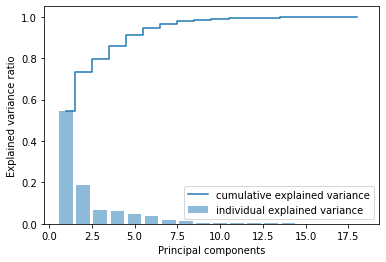

In [24]:
summation = sum(eigenvalues)
variance = [(i/summation) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 18 entries as there are 18 eigen vectors)
cum_variance=np.cumsum(variance)  # an array of cumulative variance. There will be 18 entries with 18 th entry 
# cumulative reaching almost 100%
plt.bar(range(1,19), variance, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_variance, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()


## - After getting our required parameters we see from the explained variance graph that only 8 out of 18 attributes explain 95% of the varinace
## - So we go ahead with 8 important Principle Components

In [25]:
P_reduce = np.array(eigvectors_sorted[0:8])   
X_std_8D = np.dot(X_scaled,P_reduce.T)   
reduced_pca = pd.DataFrame(X_std_8D) 
reduced_pca

0         1         2         3         4         5         6  \
0   -0.591125 -0.655523  0.564477 -0.659870  0.855251 -1.835814  0.155983   
1    1.524878 -0.327117  0.251528  1.296236  0.282463 -0.091649 -0.209862   
2   -3.969982  0.239514  1.229875  0.180391 -0.919360 -0.650638 -0.826445   
3    1.549729 -3.037566  0.466449  0.394413  0.623392  0.383794 -0.131539   
4   -5.468963  4.651385 -1.290061  0.023804 -1.692033  2.510965 -0.315330   
..        ...       ...       ...       ...       ...       ...       ...   
808  0.368201 -0.641878 -1.481101  0.164090 -0.777381 -0.934650 -0.874360   
809  0.040917 -0.160848 -0.473839 -0.179208  1.978454 -1.431609  0.279248   
810 -5.188919 -0.171319  0.585738 -0.886837  1.348744  0.225891 -0.888525   
811  3.321748 -1.094132 -1.930953  0.339361  0.527587 -0.030116  0.265542   
812  5.012853  0.432697 -1.315713  0.196398  0.167606  0.345863  0.409124   

            7  
0   -0.683144  
1    0.127745  
2    0.163185  
3   -0.176248  
4    0.475009  
..        ...  
808  0.193428  
809 -0.302916  
810 -0.429704  
811  0.451123  
812 -0.221262  

[813 rows x 8 columns]

## - Here we get the Principle components as our main features

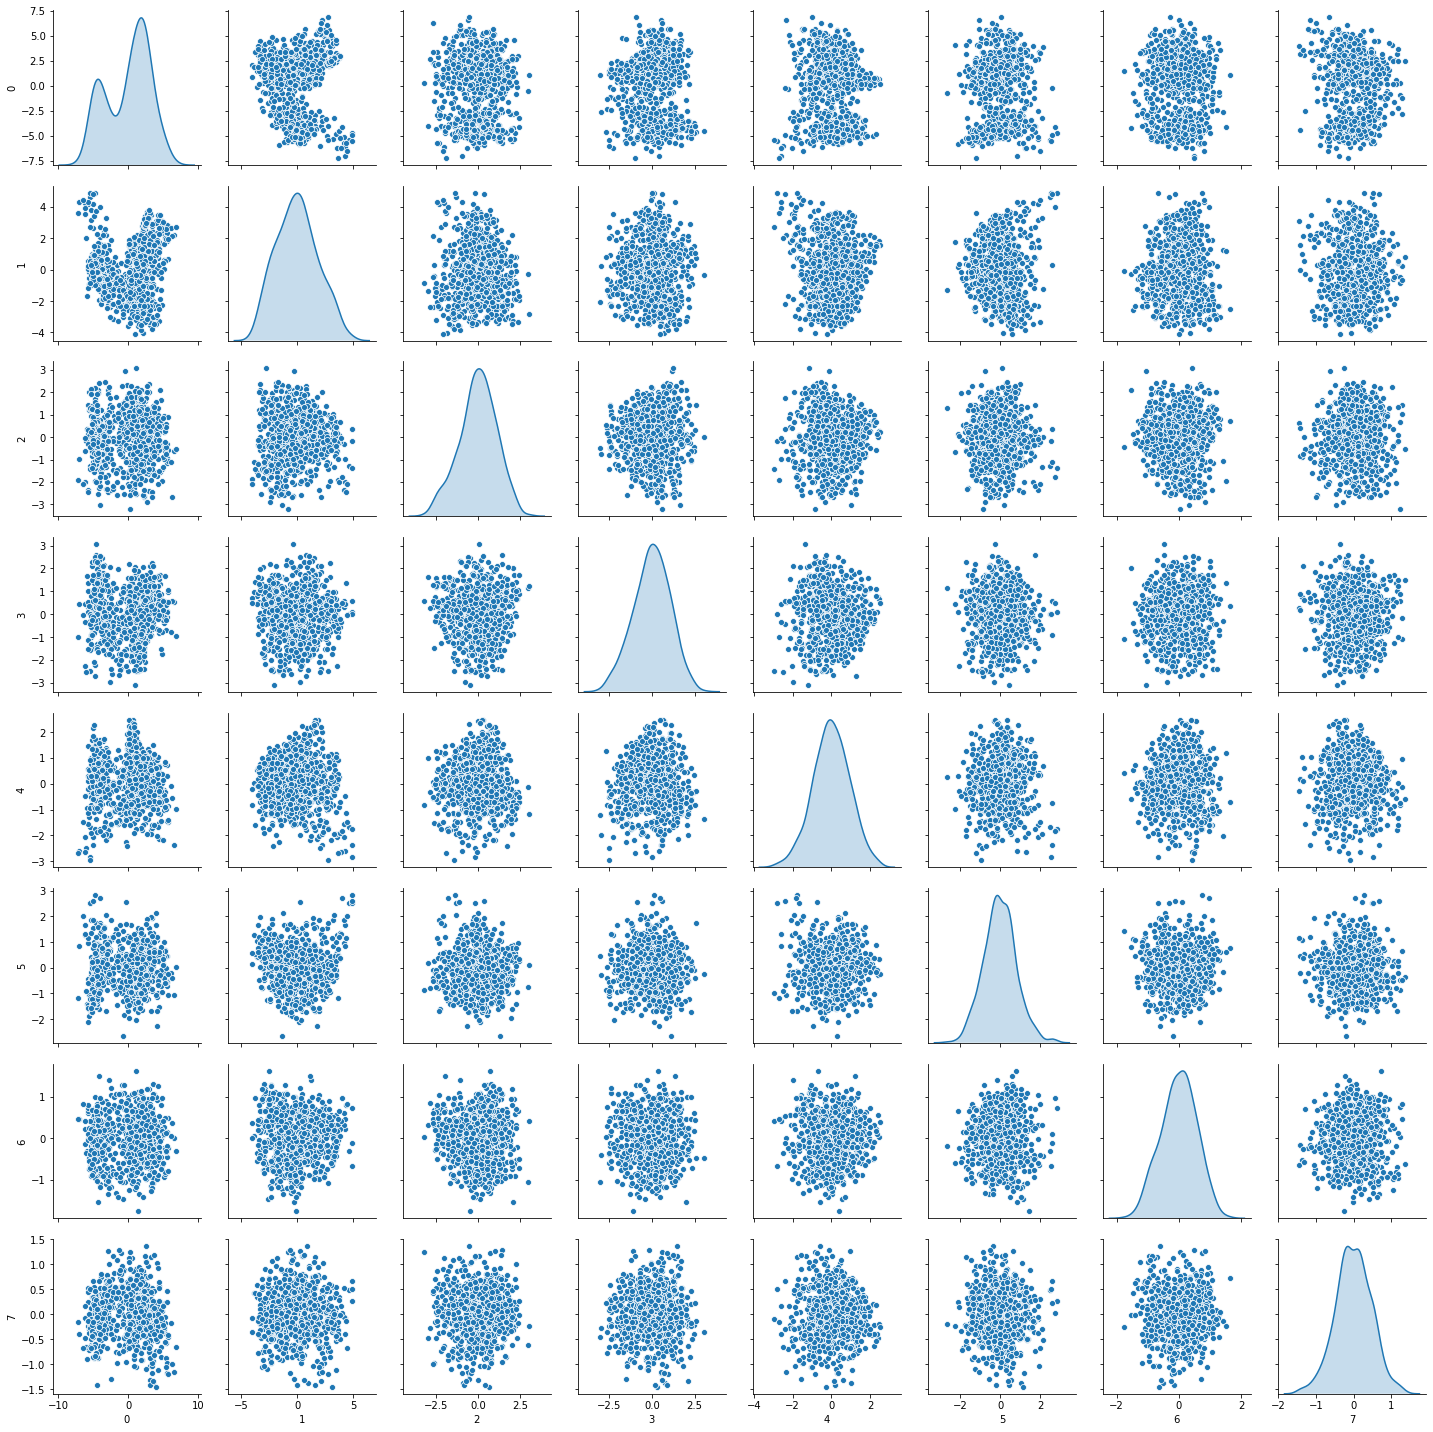

In [26]:
sns.pairplot(reduced_pca, diag_kind='kde') 



# - As we can see in the pairplot there is not correlation between any of our attributes

In [27]:
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(reduced_pca,y,test_size=0.30,random_state=1)
print("{0:0.2f}% data is in training set".format((len(pca_X_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(pca_X_test)/len(data.index)) * 100))

67.26% data is in training set
28.84% data is in test set


## Above Step 3 but with PCA reducded data (splitting into train:test)

In [28]:
svc1 = SVC()
svc1.fit(pca_X_train,pca_y_train)
pca_y_predict = svc1.predict(pca_X_test)
print("Model Score On reduced Data ",svc1.score(pca_X_test, pca_y_test)*100, '%')
print('\n\nConfusion matrix of Original Data:\n', confusion_matrix(pca_y_test, pca_y_predict ))

Model Score On reduced Data  96.72131147540983 %


Confusion matrix of Original Data:
 [[ 78   0   0]
 [  2 118   1]
 [  1   4  40]]


# - Here we train a SVM model with reduced PCA data set and see that accuracy is 96.72 %. This is less than our normal model but not a lot of accuracy is compromised given that we removed 10 attributes

In [29]:
kfold = KFold(n_splits=10, random_state=1)
results2 = cross_val_score(svc1,reduced_pca, y, cv=kfold)
print(results2)
print("Accuracy: %.3f%% (%.3f%%)" % (results2.mean()*100.0, results2.std()*100.0))

[0.92682927 0.98780488 0.96341463 0.96296296 0.95061728 0.97530864
 0.9382716  0.95061728 0.96296296 0.95061728]
Accuracy: 95.694% (1.667%)


## - Above is k fold cross validation for PCA reduced data set

In [30]:
print("Classification Report For Raw Data:", "\n", classification_report(O_y_test,O_y_predict))
print("Classification Report For PCA:","\n", classification_report(pca_y_test,pca_y_predict))
print("\nCross Validation Accuracy of Raw data: %.3f%% (%.3f%%)" % (results1.mean()*100.0, results1.std()*100.0))
print("\nCross Validation Accuracy of PCA data: %.3f%% (%.3f%%)" % (results2.mean()*100.0, results2.std()*100.0))

Classification Report For Raw Data: 
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        78
         1.0       0.98      0.98      0.98       121
         2.0       0.98      0.93      0.95        45

    accuracy                           0.98       244
   macro avg       0.98      0.97      0.98       244
weighted avg       0.98      0.98      0.98       244

Classification Report For PCA: 
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        78
         1.0       0.97      0.98      0.97       121
         2.0       0.98      0.89      0.93        45

    accuracy                           0.97       244
   macro avg       0.97      0.95      0.96       244
weighted avg       0.97      0.97      0.97       244


Cross Validation Accuracy of Raw data: 96.926% (1.997%)

Cross Validation Accuracy of PCA data: 95.694% (1.667%)


# - Here we generate reports for Raw trained data set and PCA reduced data set
# - We see that  Principle component analysis can do dimensionality reduction and choose only the very important Attributes by analysing the relationship between independent attributes to see which will be relevant in building model.
#  - Although we compromise very little with accuracy, PCA model is pure(as in no relation between independent varibles) and another huge advantage is we will be increasing processing speed and implementation would be easier 